In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer  # null 값 제거 시
from sklearn.preprocessing import PolynomialFeatures  # 피쳐 계산해 새로운 피쳐 만들기
from sklearn.preprocessing import StandardScaler # 
from sklearn.feature_selection import VarianceThreshold # feature importance 계산할 때 분산 적은 것 걸러내려고?
from sklearn.feature_selection import SelectFromModel  # feature importance 계산해 중요 피쳐 뽑아내려고?
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
import glob
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [3]:
file_path = glob.glob('./data/*.csv')

In [4]:
file_path

['./data\\sample_submission.csv', './data\\test.csv', './data\\train.csv']

In [5]:
DEBUG = True

In [6]:
if DEBUG:
    NROWS = 50000
else:
    NROWS = None

In [7]:
%%time
train = pd.read_csv(file_path[2], nrows=NROWS)
test = pd.read_csv(file_path[1], nrows=NROWS)

Wall time: 611 ms


In [111]:
%%time
train = pd.read_csv(file_path[2], nrows=None)
test = pd.read_csv(file_path[1], nrows=None)

Wall time: 15.3 s


In [118]:
%%time
# random sampling
train = train.sample(frac=0.1)
test = test.sample(frac=0.1)

Wall time: 39 ms


In [8]:
train.shape, test.shape

((50000, 59), (50000, 58))

---

In [9]:
# imbalance 한 것 생각 시
from sklearn.model_selection import StratifiedKFold

In [10]:
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1980)

In [11]:
for trn_idx, val_idx in fold.split(train, train['target']):
    break

In [12]:
trn_idx

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [13]:
val_idx

array([   44,    46,    55, ..., 49979, 49981, 49992])

In [14]:
trn = train.iloc[trn_idx]

In [15]:
val = train.iloc[val_idx]

---

In [16]:
DEBUG = True

In [17]:
if DEBUG:
    NROWS = 50000
else:
    NROWS = None

In [18]:
%%time
train = pd.read_csv(file_path[2], nrows=NROWS)
test = pd.read_csv(file_path[1], nrows=NROWS)
# random sampling
train = train.sample(frac=0.1)
test = test.sample(frac=0.1)

Wall time: 759 ms


In [19]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
25740,64472,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,8,1,0,0,0.9,0.5,1.121940,8,1,-1,0,0,4,1,1,0,1,12,3,0.400000,0.738283,0.370810,3.316625,0.1,0.8,0.6,3,2,9,1,11,1,11,4,3,3,7,0,1,0,1,1,0
17157,43029,0,2,1,7,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,0.3,0.829533,7,1,1,0,0,11,1,1,3,1,99,2,0.316228,0.577147,0.303315,2.449490,0.5,0.5,0.9,0,1,10,3,8,2,10,3,2,2,7,0,1,0,0,1,0
31001,77773,0,3,1,3,1,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,0.6,0.998749,6,1,-1,0,0,11,1,1,0,1,101,3,0.374166,0.780284,0.384968,3.316625,0.8,0.8,0.5,4,1,9,3,9,2,6,5,4,2,6,0,0,0,0,0,0
10307,26015,0,0,1,7,0,0,0,0,0,1,0,0,0,0,0,11,1,0,0,0.3,0.0,0.732718,7,1,0,0,1,11,1,1,2,1,99,2,0.315595,0.527175,0.305778,1.414214,0.8,0.0,0.8,0,3,9,5,10,2,15,5,0,2,6,1,1,1,0,1,1
32497,81445,0,5,2,1,1,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.7,1.041933,11,1,-1,0,-1,0,1,1,2,1,22,3,0.316228,0.791366,0.374566,3.464102,0.4,0.4,0.8,1,0,7,3,10,5,6,5,2,3,12,0,1,1,0,0,0


In [20]:
cat_cols = [col for col in train.columns if 'cat' in col]

In [21]:
cat_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [22]:
train[cat_cols[13]].value_counts()

104    700
103    188
64     179
87     137
28     113
      ... 
6       11
35      11
56       9
18       8
63       3
Name: ps_car_11_cat, Length: 104, dtype: int64

In [23]:
for col in cat_cols:
    print(col, train[col].nunique())

ps_ind_02_cat 4
ps_ind_04_cat 2
ps_ind_05_cat 8
ps_car_01_cat 12
ps_car_02_cat 2
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


high cardinality category : ps_car_11_cat 104개

In [24]:
train.shape

(5000, 59)

In [25]:
train.drop_duplicates()
train.shape

(5000, 59)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 25740 to 6806
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5000 non-null   int64  
 1   target          5000 non-null   int64  
 2   ps_ind_01       5000 non-null   int64  
 3   ps_ind_02_cat   5000 non-null   int64  
 4   ps_ind_03       5000 non-null   int64  
 5   ps_ind_04_cat   5000 non-null   int64  
 6   ps_ind_05_cat   5000 non-null   int64  
 7   ps_ind_06_bin   5000 non-null   int64  
 8   ps_ind_07_bin   5000 non-null   int64  
 9   ps_ind_08_bin   5000 non-null   int64  
 10  ps_ind_09_bin   5000 non-null   int64  
 11  ps_ind_10_bin   5000 non-null   int64  
 12  ps_ind_11_bin   5000 non-null   int64  
 13  ps_ind_12_bin   5000 non-null   int64  
 14  ps_ind_13_bin   5000 non-null   int64  
 15  ps_ind_14       5000 non-null   int64  
 16  ps_ind_15       5000 non-null   int64  
 17  ps_ind_16_bin   5000 non-null

obj 는 string 인데 이게 없으니 라벨 인코딩 안써도 된다.

+ Metadata

- store meta information in a data frame
- helpful in select variables
- role
- level
- keep
- dtype

In [27]:
data = []

for f in train.columns:
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
    
    #defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    else:
        level = 'ordinal'
    '''
    elif train[f].dtype == int:
        level = 'ordinal'
    '''
    keep = True
    if f == 'id':
        keep = False
    
    dtype = train[f].dtype
    
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [28]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [29]:
train['ps_car_11'].dtype

dtype('int64')

In [30]:
train['ps_car_11'].dtype == int

False

In [31]:
train['ps_car_12'].dtype

dtype('float64')

In [32]:
train['ps_car_12'].dtype == float

True

In [33]:
train['ps_car_12'].dtype == float

True

In [34]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [35]:
pd.DataFrame({'count': meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### Descriptive statistics

+ we can also apply the `describe` method on the dataframe. However, it does not make sense to calculate the mean, std, ... on categorical variables and the id variable.

+ we will explore the categorical variables visually later.

+ thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics.

+ **Interval variables**

In [36]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.605560,0.435520,0.539866,0.381029,0.815116,0.285425,3.070943,0.449280,0.452160,0.451960
std,0.290692,0.400573,0.803376,0.058914,0.223573,0.343455,0.709937,0.286063,0.287151,0.284458
min,0.000000,0.000000,-1.000000,0.141421,0.329349,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.519615,0.316228,0.673326,0.336155,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.722193,0.374166,0.765494,0.368782,3.316625,0.400000,0.400000,0.500000
75%,0.900000,0.600000,1.003743,0.400000,0.910462,0.397492,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,3.197753,0.818535,2.695113,0.591608,3.741657,0.900000,0.900000,0.900000


In [37]:
v

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

+ feature selection 할 때 쓰냐 안쓰냐 업데이트 하는게 중요하더라

+ **reg variables**
+ only ps_reg_03 has missing values.
+ the range differs between the variables. we could apply scaling(StandardScaler), but it depends on the classifier we will want to use. ex)tree 모델은 스케일링 영향 x

+ **car variables**
+ ps_car_12 and ps_car_15 have missing values
+ the range differs and we could apply scailing.

+ **calc variables**
+ no missing values
+ this seems to be some kind of ratio as the maximum is 0.9
+ all three `_calc` varialbes have very similar distributions

we can see that the range of the interval variables is rather small. Perhaps some transformation is already applied in order to anonymize the data?

### Ordinal variables

In [38]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,1.935800,4.455600,0.010400,7.312600,2.356200,2.386200,1.877600,7.65180,3.007600,9.201600,2.33100,8.464600,5.462000,1.434000,2.865400,7.51140
std,2.019726,2.689363,0.117875,3.546463,0.818447,1.127876,1.140034,1.34243,1.416031,1.466897,1.24938,2.889155,2.356961,1.191607,1.688862,2.72429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.00000,2.000000,8.000000,1.00000,6.000000,4.000000,1.000000,2.000000,6.00000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.00000,3.000000,9.000000,2.00000,8.000000,5.000000,1.000000,3.000000,7.00000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.00000,4.000000,10.000000,3.00000,10.000000,7.000000,2.000000,4.000000,9.00000
max,7.000000,11.000000,3.000000,13.000000,3.000000,5.000000,6.000000,10.00000,7.000000,12.000000,7.00000,21.000000,16.000000,7.000000,11.000000,19.00000


+ only one missing variable : ps_car_11
+ we could apply scailing to deal with the different ranges

### Binary variables

In [39]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.038800,0.392600,0.249600,0.170400,0.187400,0.0,0.002400,0.007200,0.000800,0.666000,0.117000,0.153600,0.125000,0.626400,0.546200,0.287800,0.351600,0.148000
std,0.193137,0.488378,0.432825,0.376021,0.390271,0.0,0.048936,0.084555,0.028276,0.471687,0.321452,0.360601,0.330752,0.483808,0.497911,0.452783,0.477518,0.355136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


+ a prior in the train data is 3.645% which is **strongly imbalanced**.
+ from the means we can conclude that for most variables the value is zero in most cases.

### Handling imbalanced classes

+ as we mentioned above the proportion of records with target=1 is far less than target=0. 
+ This can lead to a model that has great accuracy but does have any added value in practice. 
+ Two possible strategies to deal with this problem are:

```   
+  oversampling records with target=1
+  undersampling records with target=0
```   
+ There are many more strategies of course and MachineLearningMastery.com gives a nice overview. 
+ As we have a rather large training set, we can go for undersampling.
+ 오버샘플링 좋았던 적이 별로 없었다 함.
+ 샘플링 패키지 imbalanced-learn

In [40]:
desired_apriori = 0.10

# get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print(f'Rate to undersample records with target=0: {undersampling_rate}')
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# return undersampled data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.3632958801498127
Number of records with target=0 after undersampling: 1745


### Data quality check

#### Checking missing values
+ missings are represented as -1

In [41]:
vars_with_missing = []

for f in train.columns:
    missings = train.loc[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print(f'Variable {f} has {missings} reocords ({missings_perc:.2%}) with missing values')
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))    

Variable ps_ind_05_cat has 28 reocords (1.44%) with missing values
Variable ps_reg_03 has 353 reocords (18.21%) with missing values
Variable ps_car_03_cat has 1335 reocords (68.85%) with missing values
Variable ps_car_05_cat has 854 reocords (44.04%) with missing values
Variable ps_car_07_cat has 47 reocords (2.42%) with missing values
Variable ps_car_09_cat has 1 reocords (0.05%) with missing values
Variable ps_car_14 has 124 reocords (6.40%) with missing values
In total, there are 7 variables with missing values


+ ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.
+ 맘대로 지우면 안되는데.


In [42]:
train[['ps_car_03_cat', 'target']].groupby('ps_car_03_cat').mean()

,target
ps_car_03_cat,
-1,0.090637
0,0.087137
1,0.143251


In [43]:
train[['ps_car_05_cat', 'target']].groupby('ps_car_05_cat').mean()

,target
ps_car_05_cat,
-1,0.084309
0,0.111111
1,0.113677


+ missing value 자체가 target에 유의미할 수가 있는데 여기서는 별 의미 없는 것으로 보인다.

+ For the other categorical variables with missing values, we can leave the missing value -1 as such.

+ ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.

+ ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.

+ ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
+ ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

missing value 도 함부로 채우면 안된다. 
미싱밸류 없는 변수로 학습하고 채우는 방법도 있다.
바이어스 줄 수 있으니 함부로 채우지 말자

In [44]:
# dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, axis=1, inplace=True)
meta.loc[(vars_to_drop), 'keep'] = False # updating the meta


In [45]:
# missing value 채우기 groupby 로 하기 ps_reg_03 채우고 싶은 경우
temp_series = train[['ps_car_01_cat', 'ps_car_02_cat', 'ps_reg_03']].groupby(['ps_car_01_cat', 'ps_car_02_cat']).mean()
temp_series

ps_reg_03
ps_car_01_cat ps_car_02_cat           
0             0               0.250658
              1               0.532915
1             0               1.786932
              1               0.882648
2             1               1.024527
3             0               0.759043
              1               0.926744
4             0               0.448901
              1               0.241419
5             1               0.171337
6             0               0.602337
              1               0.411477
7             0               0.629854
              1               0.281474
8             0               0.542535
              1               0.656183
9             0               0.727466
              1               0.592171
10            0               0.841019
              1               0.761247
11            0               0.938471
              1               0.736761

In [46]:
temp_series.reset_index(inplace=True)
temp_series

,ps_car_01_cat,ps_car_02_cat,ps_reg_03
0,0,0,0.250658
1,0,1,0.532915
2,1,0,1.786932
3,1,1,0.882648
4,2,1,1.024527
5,3,0,0.759043
6,3,1,0.926744
7,4,0,0.448901
8,4,1,0.241419
9,5,1,0.171337


In [47]:
train.loc[train['ps_reg_03'] == -1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
23,95917,0,2,1,1,1,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.1,0.2,-1.0,5,1,0,0,1,1,2,1,39,3,0.316070,0.684932,-1.000000,3.000000,0.5,0.0,0.8,4,2,7,3,10,3,15,3,2,3,6,0,1,0,0,0,0
28,11810,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,6,0,1,0,0.1,0.2,-1.0,7,1,0,1,1,1,2,0,51,2,0.374166,0.905812,0.401746,3.605551,0.3,0.1,0.7,2,3,5,4,8,4,6,4,1,0,7,0,0,0,0,1,0
29,59236,0,0,1,4,1,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.0,0.9,-1.0,7,1,0,0,1,1,2,1,39,3,0.316070,0.640199,0.374433,2.645751,0.9,0.3,0.5,2,1,7,2,7,1,9,7,3,1,2,0,0,1,0,0,0
39,81876,0,1,1,8,0,0,0,1,0,0,0,0,0,0,0,9,1,0,0,0.1,0.2,-1.0,6,1,2,1,1,1,0,1,90,0,0.374166,0.739360,0.416653,3.464102,0.0,0.8,0.4,3,1,9,3,11,2,5,3,2,5,11,0,0,0,1,0,0
43,88335,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0.3,0.3,-1.0,6,1,0,11,1,1,0,1,103,1,0.316228,0.573412,0.358329,2.645751,0.4,0.4,0.9,1,2,7,4,9,4,10,5,3,6,7,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,73512,1,2,1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.1,0.1,-1.0,9,1,0,14,1,1,2,1,29,3,0.447214,1.016334,0.366060,3.605551,0.8,0.8,0.7,3,1,7,3,7,3,7,6,0,2,13,0,1,1,0,1,0
1915,31335,1,1,1,5,1,0,0,0,1,0,0,0,0,0,0,13,1,0,0,0.2,0.3,-1.0,7,1,0,11,1,1,2,1,103,3,0.316228,0.618833,0.358329,2.645751,0.9,0.6,0.1,4,2,10,2,10,0,7,4,3,2,5,0,1,1,1,1,0
1917,92292,1,5,1,4,1,4,0,0,1,0,0,0,0,0,0,8,0,1,0,0.2,0.4,-1.0,11,0,0,10,1,1,2,1,83,2,0.424264,0.905824,0.342053,2.828427,0.8,0.9,0.4,3,0,5,6,11,4,9,5,2,4,2,0,1,1,1,1,0
1930,28357,1,1,1,7,1,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.3,0.3,-1.0,7,1,0,11,1,1,2,1,101,3,0.374166,0.767361,0.384968,3.316625,0.5,0.5,0.8,3,1,6,1,7,2,8,6,3,1,7,0,1,1,0,0,0


In [48]:
train.loc[train['ps_reg_03'] == -1].merge(temp_series, on=['ps_car_01_cat', 'ps_car_02_cat'], how='left', suffixes=('_old', '_new'))

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03_old,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_reg_03_new
0,95917,0,2,1,1,1,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.1,0.2,-1.0,5,1,0,0,1,1,2,1,39,3,0.316070,0.684932,-1.000000,3.000000,0.5,0.0,0.8,4,2,7,3,10,3,15,3,2,3,6,0,1,0,0,0,0,0.171337
1,11810,0,0,1,7,0,0,1,0,0,0,0,0,0,0,0,6,0,1,0,0.1,0.2,-1.0,7,1,0,1,1,1,2,0,51,2,0.374166,0.905812,0.401746,3.605551,0.3,0.1,0.7,2,3,5,4,8,4,6,4,1,0,7,0,0,0,0,1,0,0.281474
2,59236,0,0,1,4,1,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.0,0.9,-1.0,7,1,0,0,1,1,2,1,39,3,0.316070,0.640199,0.374433,2.645751,0.9,0.3,0.5,2,1,7,2,7,1,9,7,3,1,2,0,0,1,0,0,0,0.281474
3,81876,0,1,1,8,0,0,0,1,0,0,0,0,0,0,0,9,1,0,0,0.1,0.2,-1.0,6,1,2,1,1,1,0,1,90,0,0.374166,0.739360,0.416653,3.464102,0.0,0.8,0.4,3,1,9,3,11,2,5,3,2,5,11,0,0,0,1,0,0,0.411477
4,88335,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0.3,0.3,-1.0,6,1,0,11,1,1,0,1,103,1,0.316228,0.573412,0.358329,2.645751,0.4,0.4,0.9,1,2,7,4,9,4,10,5,3,6,7,0,1,1,1,1,0,0.411477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,73512,1,2,1,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.1,0.1,-1.0,9,1,0,14,1,1,2,1,29,3,0.447214,1.016334,0.366060,3.605551,0.8,0.8,0.7,3,1,7,3,7,3,7,6,0,2,13,0,1,1,0,1,0,0.592171
349,31335,1,1,1,5,1,0,0,0,1,0,0,0,0,0,0,13,1,0,0,0.2,0.3,-1.0,7,1,0,11,1,1,2,1,103,3,0.316228,0.618833,0.358329,2.645751,0.9,0.6,0.1,4,2,10,2,10,0,7,4,3,2,5,0,1,1,1,1,0,0.281474
350,92292,1,5,1,4,1,4,0,0,1,0,0,0,0,0,0,8,0,1,0,0.2,0.4,-1.0,11,0,0,10,1,1,2,1,83,2,0.424264,0.905824,0.342053,2.828427,0.8,0.9,0.4,3,0,5,6,11,4,9,5,2,4,2,0,1,1,1,1,0,0.938471
351,28357,1,1,1,7,1,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.3,0.3,-1.0,7,1,0,11,1,1,2,1,101,3,0.374166,0.767361,0.384968,3.316625,0.5,0.5,0.8,3,1,6,1,7,2,8,6,3,1,7,0,1,1,0,0,0,0.281474


+ 이렇게 groupby 써서 세분류로 들어가 각기 채울 수 있다.
---

In [49]:
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

In [50]:
mean_imp.fit_transform(train[['ps_reg_03']])

array([[0.96727711],
       [0.61083959],
       [0.82044195],
       ...,
       [0.70489361],
       [0.90519335],
       [1.44416931]])

In [51]:
mean_imp.fit_transform(train[['ps_reg_03']]).shape

(1939, 1)

In [52]:
# 2차원 벡터가 되니까 풀어준다. ravel()
mean_imp.fit_transform(train[['ps_reg_03']]).ravel().shape

(1939,)

In [53]:
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### checking the cardinality of the categorical variables
+ cardinality refers to the number of different values in a variable.
+ as we will create dummy variables from the categorical variables later on, we need to check whether there are vairables with many distinct values.
+ we should handle these vairables differently as they would result in many dummy variables.

In [54]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Varialbe {} has {} distinct values'.format(f, dist_values))

Varialbe ps_ind_02_cat has 4 distinct values
Varialbe ps_ind_04_cat has 2 distinct values
Varialbe ps_ind_05_cat has 8 distinct values
Varialbe ps_car_01_cat has 12 distinct values
Varialbe ps_car_02_cat has 2 distinct values
Varialbe ps_car_04_cat has 10 distinct values
Varialbe ps_car_06_cat has 18 distinct values
Varialbe ps_car_07_cat has 3 distinct values
Varialbe ps_car_08_cat has 2 distinct values
Varialbe ps_car_09_cat has 6 distinct values
Varialbe ps_car_10_cat has 2 distinct values
Varialbe ps_car_11_cat has 104 distinct values


In [55]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

sum = 0
for f in v:
    dist_values = train[f].nunique()
    sum += dist_values
    print('Varialbe {} has {} distinct values'.format(f, dist_values))

Varialbe ps_ind_02_cat has 4 distinct values
Varialbe ps_ind_04_cat has 2 distinct values
Varialbe ps_ind_05_cat has 8 distinct values
Varialbe ps_car_01_cat has 12 distinct values
Varialbe ps_car_02_cat has 2 distinct values
Varialbe ps_car_04_cat has 10 distinct values
Varialbe ps_car_06_cat has 18 distinct values
Varialbe ps_car_07_cat has 3 distinct values
Varialbe ps_car_08_cat has 2 distinct values
Varialbe ps_car_09_cat has 6 distinct values
Varialbe ps_car_10_cat has 2 distinct values
Varialbe ps_car_11_cat has 104 distinct values


In [56]:
sum

173

In [57]:
sum - 104

69

+ column 이 늘어나면 연산량이 늘어남
+ tree 모델은 스무고개 같은 건데 column이 많으면 물어볼 질문이 많아진다. 중요한 질문을 못 건드릴 가능성도 있다. 답으로 가기 위한 과정이 길어진다. 원하지도 않은 split이 생길 가능성도 있다.

+ **mean encoding**
  + 타겟이 0,1 바이너리 이거나 정수 값인 경우 해당 카테고리의 타겟 평균 값으로 인코딩 해주는 것
  + 약점 : 오버피팅이 일어날 수 있다. 타겟과 명확한 연관성을 만들어주는 것이기 때문에.
  + 규제를 추가해 노이즈 넣어주는 경우도 있다.
  
+ **frequency encoding**
  + 특정 피쳐 카테고리가 전체에서 차지하는 비중으로 인코딩

+ **label encoding**
+ **target encoding**

+ 인코딩은 다양하게 해봐야 한다. 

In [59]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [60]:
trn_series = train['ps_car_11_cat']
tst_series = test['ps_car_11_cat']
target = train.target
min_samples_leaf = 100
smoothing = 10
noise_level = 0.01

In [61]:
assert len(trn_series) == len(target)
assert trn_series.name == tst_series.name

In [62]:
temp = pd.concat([trn_series, target], axis=1)

In [64]:
trn_series.name

'ps_car_11_cat'

In [65]:
target.name

'target'

In [63]:
averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

In [66]:
averages

,mean,count
ps_car_11_cat,,
1,0.000000,7
2,0.000000,6
3,0.083333,12
4,0.000000,3
5,0.068182,44
...,...,...
100,0.210526,19
101,0.238095,21
102,0.000000,11


In [67]:
temp.groupby(by=trn_series.name)[target.name].mean()

ps_car_11_cat
1      0.000000
2      0.000000
3      0.083333
4      0.000000
5      0.068182
         ...   
100    0.210526
101    0.238095
102    0.000000
103    0.082353
104    0.098859
Name: target, Length: 104, dtype: float64

In [68]:
temp.groupby(by=trn_series.name)[target.name].agg(["mean", "min"])

,mean,min
ps_car_11_cat,,
1,0.000000,0
2,0.000000,0
3,0.083333,0
4,0.000000,0
5,0.068182,0
...,...,...
100,0.210526,0
101,0.238095,0
102,0.000000,0


In [69]:
def max_min(x):
    return x.max() - x.min()

In [70]:
temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count", max_min])

,mean,count,max_min
ps_car_11_cat,,,
1,0.000000,7,0
2,0.000000,6,0
3,0.083333,12,1
4,0.000000,3,0
5,0.068182,44,1
...,...,...,...
100,0.210526,19,1
101,0.238095,21,1
102,0.000000,11,0


+ aggregate 로ㅗ 카테고리 별 통계값을 넣어 피처 엔지니어링 많이 합니다.

In [73]:
min_samples_leaf

100

In [71]:
smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

In [72]:
smoothing

ps_car_11_cat
1      0.000091
2      0.000083
3      0.000151
4      0.000061
5      0.003684
         ...   
100    0.000303
101    0.000371
102    0.000136
103    0.182426
104    1.000000
Name: count, Length: 104, dtype: float64

In [74]:
prior = target.mean()

In [75]:
averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing

In [76]:
averages

,mean,count,target
ps_car_11_cat,,,
1,0.000000,7,0.100042
2,0.000000,6,0.100043
3,0.083333,12,0.100049
4,0.000000,3,0.100045
5,0.068182,44,0.099934
...,...,...,...
100,0.210526,19,0.100085
101,0.238095,21,0.100103
102,0.000000,11,0.100038


In [77]:
averages.drop(['mean', 'count'], axis=1, inplace=True)

In [78]:
averages

,target
ps_car_11_cat,
1,0.100042
2,0.100043
3,0.100049
4,0.100045
5,0.099934
...,...
100,0.100085
101,0.100103
102,0.100038


In [81]:
trn_series.name

'ps_car_11_cat'

In [82]:
trn_series.to_frame()

,ps_car_11_cat
0,44
1,104
2,99
3,27
4,104
...,...
1934,86
1935,36
1936,19
1937,104


In [80]:
trn_series.to_frame(trn_series.name)

,ps_car_11_cat
0,44
1,104
2,99
3,27
4,104
...,...
1934,86
1935,36
1936,19
1937,104


In [83]:
averages

,target
ps_car_11_cat,
1,0.100042
2,0.100043
3,0.100049
4,0.100045
5,0.099934
...,...
100,0.100085
101,0.100103
102,0.100038


In [86]:
trn_series

0        44
1       104
2        99
3        27
4       104
       ... 
1934     86
1935     36
1936     19
1937    104
1938     49
Name: ps_car_11_cat, Length: 1939, dtype: int64

In [84]:
prior

0.1000515729757607

In [90]:
pd.merge(trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')

,ps_car_11_cat,average
0,44,0.100061
1,104,0.098859
2,99,0.099956
3,27,0.100109
4,104,0.098859
...,...,...
1934,86,0.100063
1935,36,0.100043
1936,19,0.100039
1937,104,0.098859


In [87]:
pd.merge(trn_series.to_frame(trn_series.name), 
        averages.reset_index().rename(columns={'index' : target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

0       0.100061
1       0.098859
2       0.099956
3       0.100109
4       0.098859
          ...   
1934    0.100063
1935    0.100043
1936    0.100039
1937    0.098859
1938    0.100037
Name: ps_car_11_cat_mean, Length: 1939, dtype: float64

In [95]:
ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name), 
                         averages.reset_index().rename(columns={'index' : target.name, target.name: 'average'}),
                         on=trn_series.name,
                         how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

In [96]:
ft_trn_series

0       0.100061
1       0.098859
2       0.099956
3       0.100109
4       0.098859
          ...   
1934    0.100063
1935    0.100043
1936    0.100039
1937    0.098859
1938    0.100037
Name: ps_car_11_cat_mean, Length: 1939, dtype: float64

In [97]:
ft_trn_series.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938],
           dtype='int64', length=1939)

In [98]:
ft_trn_series.index = trn_series.index 

In [99]:
ft_trn_series

0       0.100061
1       0.098859
2       0.099956
3       0.100109
4       0.098859
          ...   
1934    0.100063
1935    0.100043
1936    0.100039
1937    0.098859
1938    0.100037
Name: ps_car_11_cat_mean, Length: 1939, dtype: float64

In [100]:
ft_trn_series.index

RangeIndex(start=0, stop=1939, step=1)

In [101]:
ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

In [103]:
ft_tst_series

0       0.100067
1       0.098859
2       0.100356
3       0.098859
4       0.100045
          ...   
4995    0.100057
4996    0.100014
4997    0.096871
4998    0.100356
4999    0.100039
Name: ps_car_11_cat_mean, Length: 5000, dtype: float64

In [104]:
ft_tst_series.index = tst_series.index

In [106]:
np.random.rand(3)

array([0.85600852, 0.68433066, 0.56070363])

In [107]:
0.01 * np.random.rand(3)

array([0.0034932 , 0.00835369, 0.00587619])

In [108]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [109]:
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)

In [110]:
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta

In [111]:
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# EDA

In [112]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

In [113]:
for f in v:
    break

In [115]:
cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()

In [116]:
cat_perc

,ps_ind_02_cat,target
0,1,0.090779
1,2,0.117647
2,3,0.137615
3,4,0.150000


In [117]:
cat_perc.sort_values(by='target', ascending=False, inplace=True)

In [118]:
cat_perc

,ps_ind_02_cat,target
3,4,0.150000
2,3,0.137615
1,2,0.117647
0,1,0.090779


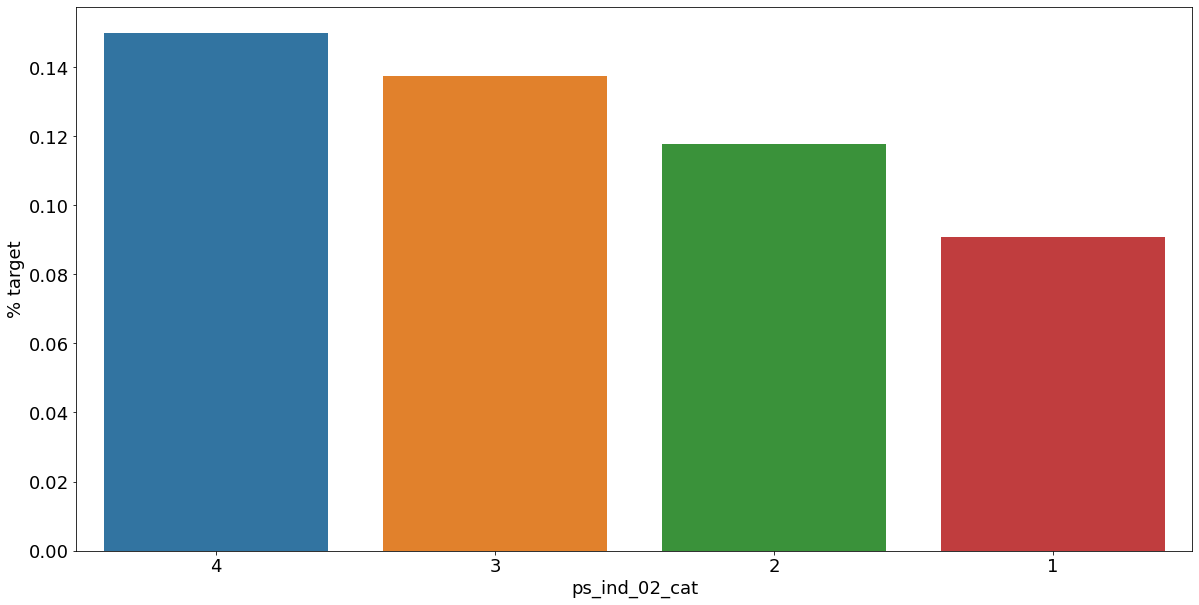

In [127]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
plt.ylabel('% target', fontsize=18)
plt.xlabel(f, fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show();

<Figure size 432x288 with 0 Axes>

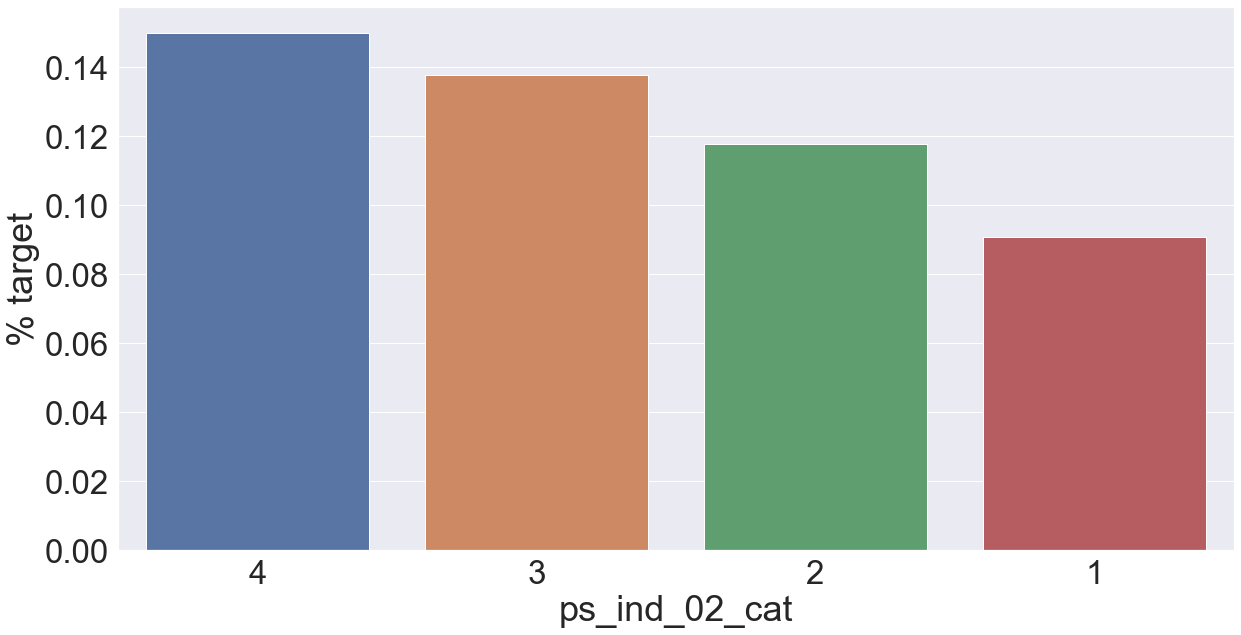

<Figure size 432x288 with 0 Axes>

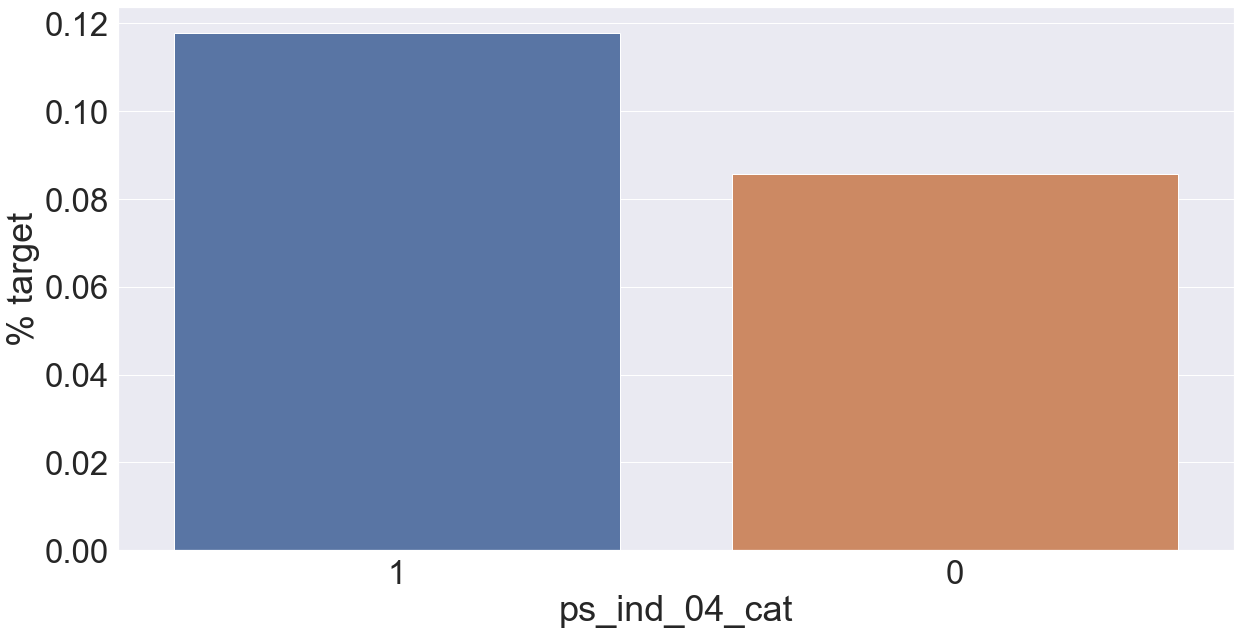

<Figure size 432x288 with 0 Axes>

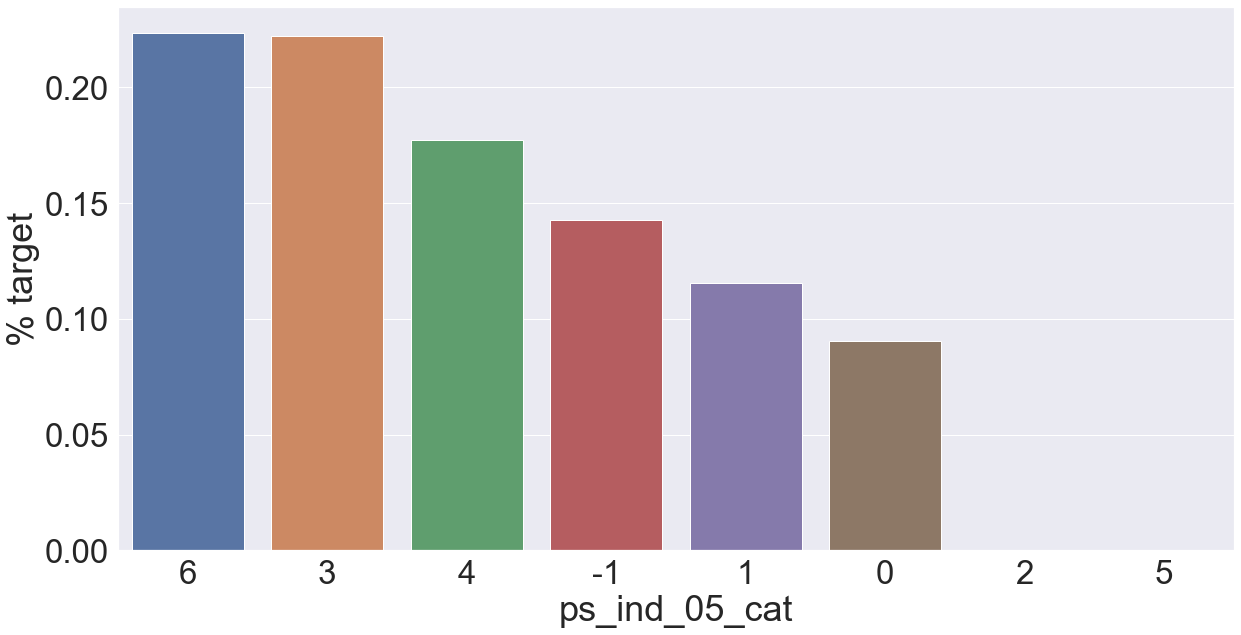

<Figure size 432x288 with 0 Axes>

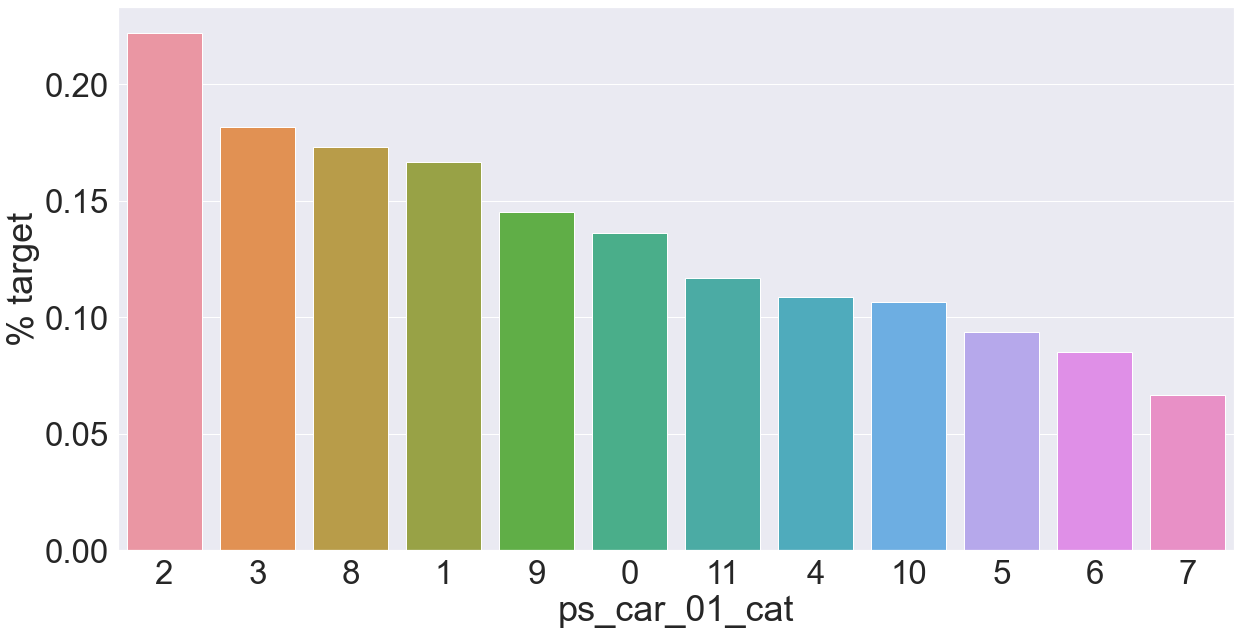

<Figure size 432x288 with 0 Axes>

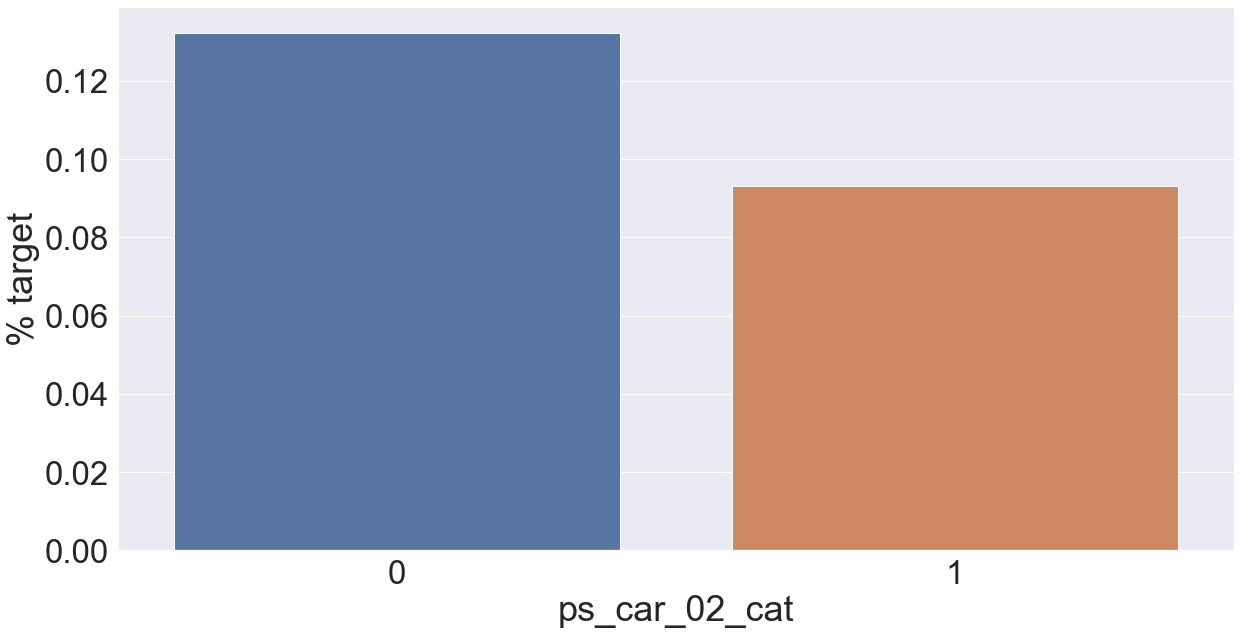

<Figure size 432x288 with 0 Axes>

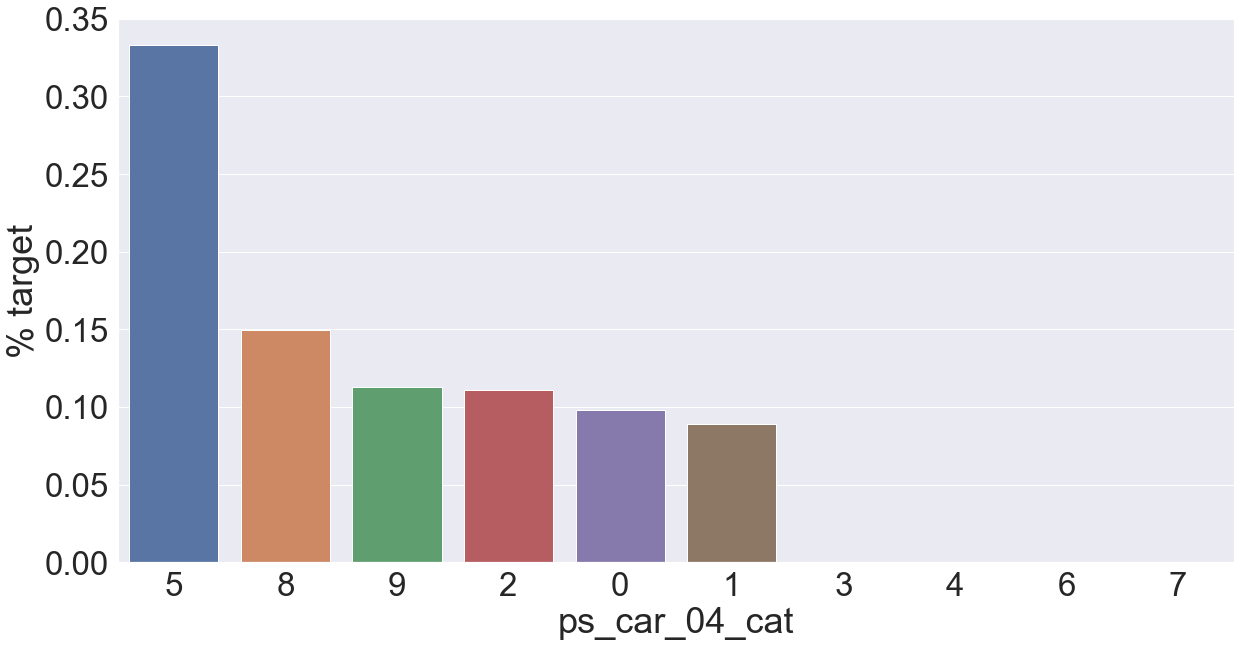

<Figure size 432x288 with 0 Axes>

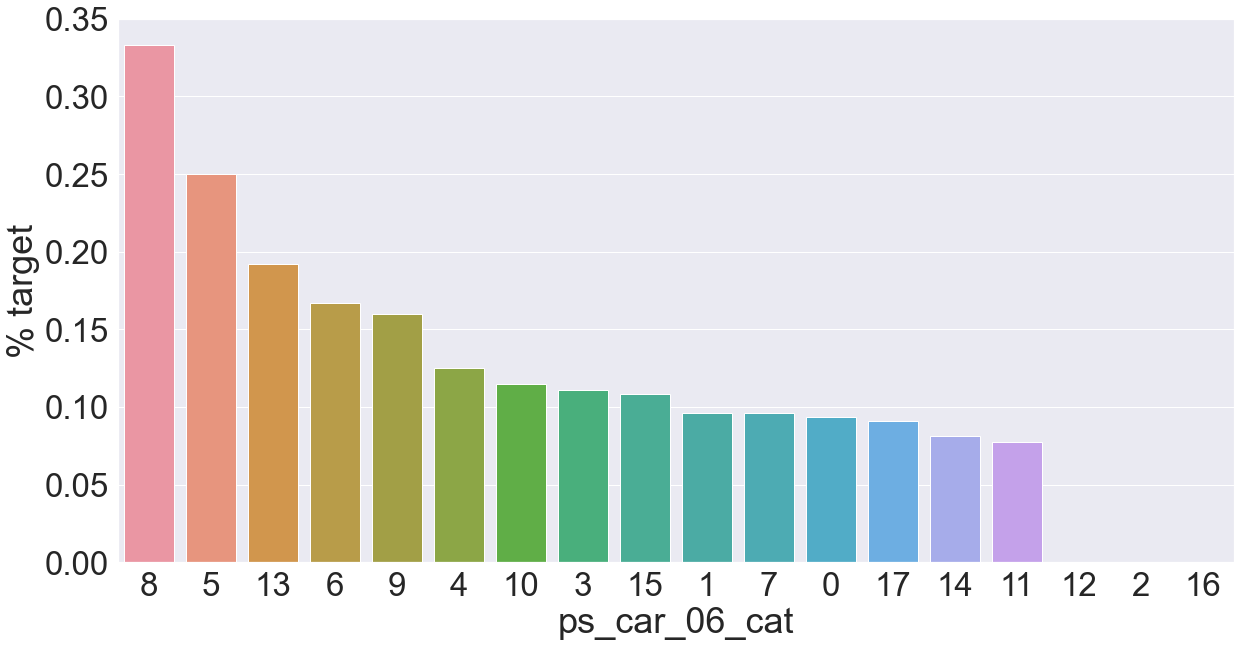

<Figure size 432x288 with 0 Axes>

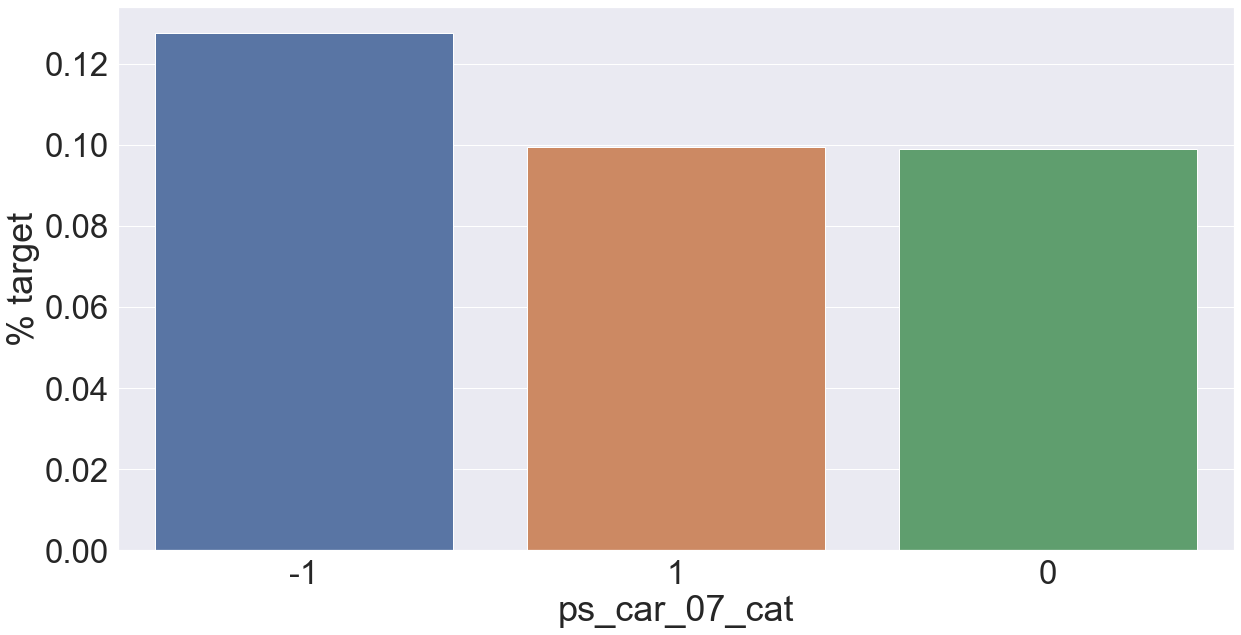

<Figure size 432x288 with 0 Axes>

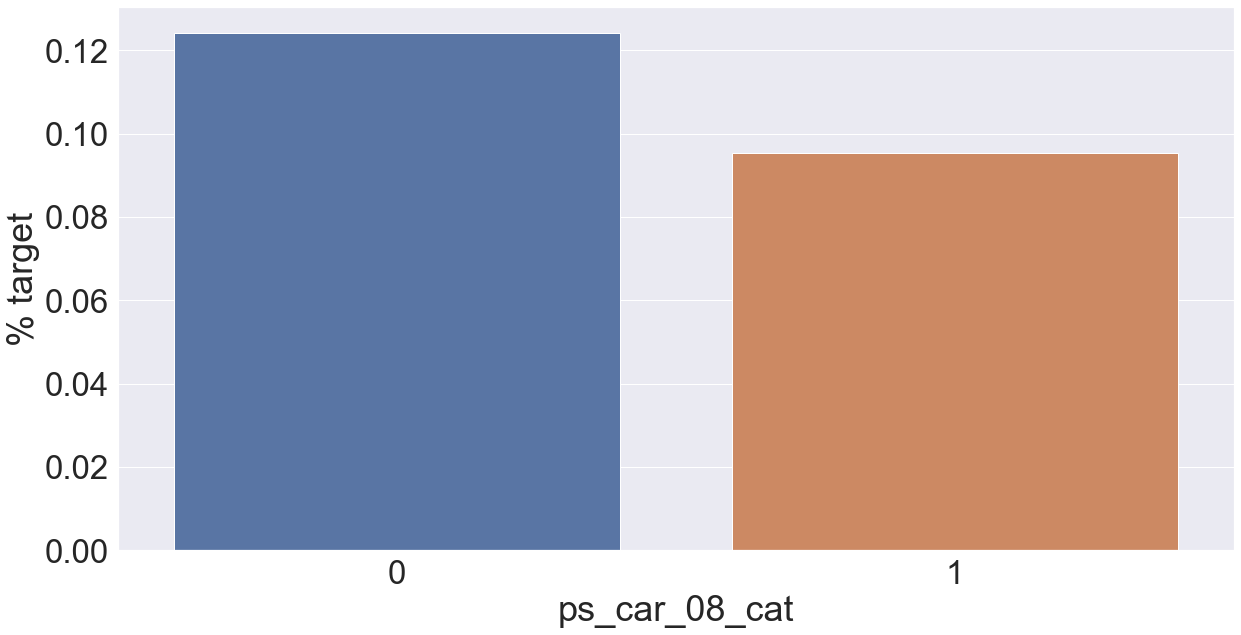

<Figure size 432x288 with 0 Axes>

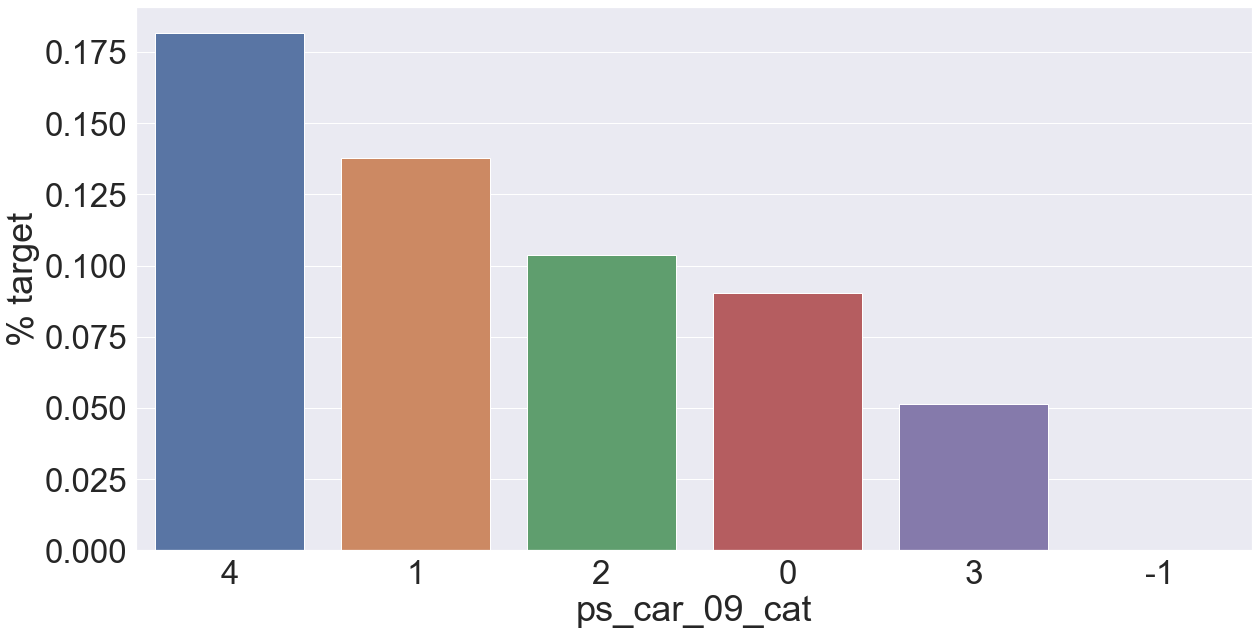

<Figure size 432x288 with 0 Axes>

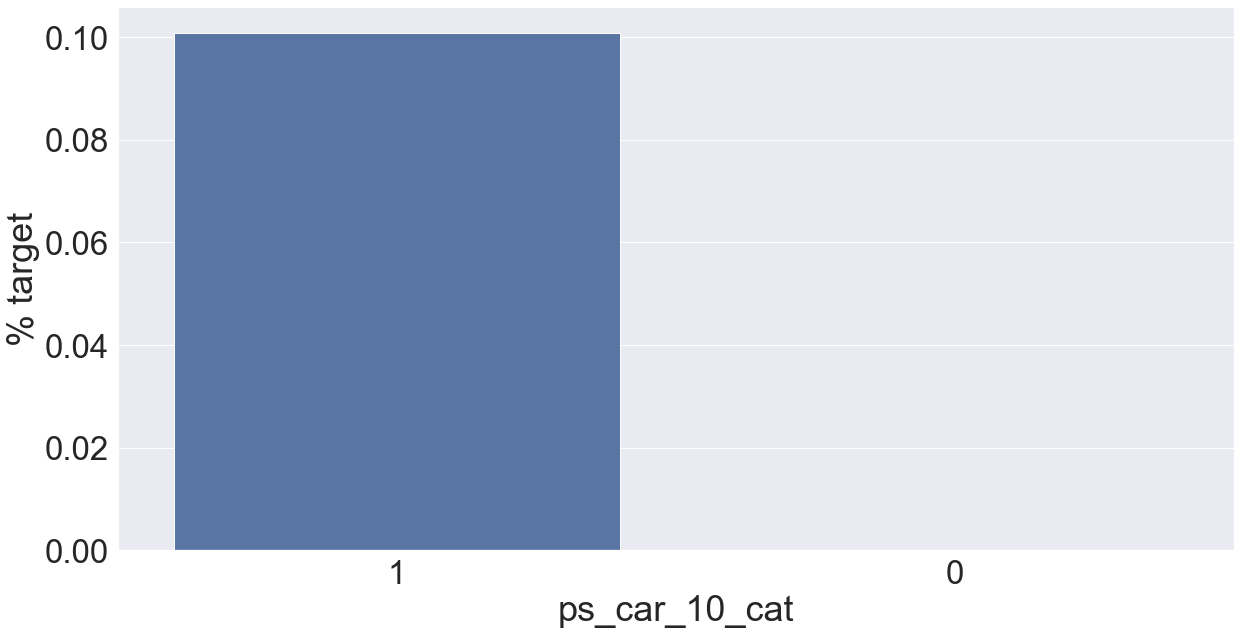

In [128]:
sns.set(font_scale=3)
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target')
    plt.xlabel(f)
    plt.tick_params(axis='both', which='major')
    plt.show();

count 도 봐야 정확한 인사이트를 얻을 수 있다.

In [132]:
f = 'ps_car_02_cat'

In [133]:
cat_perc = train[[f, 'target']].groupby([f], as_index=False).agg(['mean', 'count'])

In [134]:
cat_perc

target      
                   mean count
ps_car_02_cat                
0              0.132353   340
1              0.093183  1599

+ As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance.
+ 데이터 셋 보고 데이터 특성을 파악해서 na 채울지 말지 결정해야 한다.
+ The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

# Interval variables
+ Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables. The code below is based on [an example by Michael Waskom](http://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [135]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

In [138]:
correlations = train[v].corr()

In [139]:
correlations

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.000000,0.497929,0.142139,-0.013267,0.013845,-0.012161,0.030023,-0.016161,0.004246,0.002733
ps_reg_02,0.497929,1.000000,0.685117,0.145828,0.141834,0.077180,0.038388,0.002590,0.044046,0.009202
ps_reg_03,0.142139,0.685117,1.000000,0.196160,0.194864,0.105261,0.042932,-0.013456,0.033569,0.006544
ps_car_12,-0.013267,0.145828,0.196160,1.000000,0.677887,0.588484,0.048041,0.016123,0.003028,-0.004965
ps_car_13,0.013845,0.141834,0.194864,0.677887,1.000000,0.424270,0.522243,0.011272,0.030086,-0.005668
ps_car_14,-0.012161,0.077180,0.105261,0.588484,0.424270,1.000000,-0.009808,-0.025655,0.002117,0.020333
ps_car_15,0.030023,0.038388,0.042932,0.048041,0.522243,-0.009808,1.000000,0.017214,0.036194,-0.010557
ps_calc_01,-0.016161,0.002590,-0.013456,0.016123,0.011272,-0.025655,0.017214,1.000000,-0.054014,-0.014502
ps_calc_02,0.004246,0.044046,0.033569,0.003028,0.030086,0.002117,0.036194,-0.054014,1.000000,0.004616
ps_calc_03,0.002733,0.009202,0.006544,-0.004965,-0.005668,0.020333,-0.010557,-0.014502,0.004616,1.000000


In [141]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

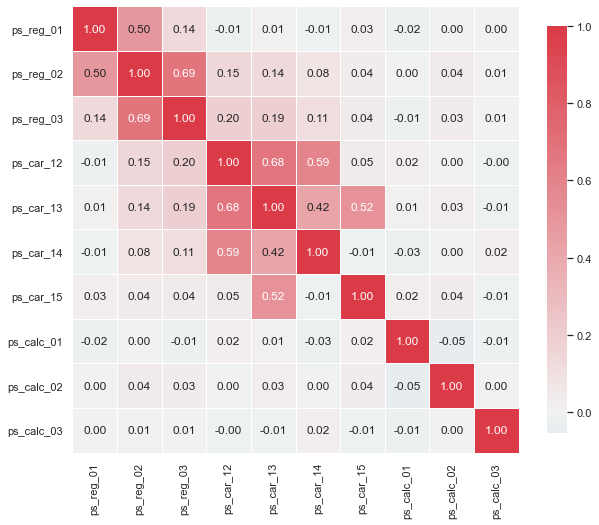

In [144]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
           square=True, linewidths=.5, annot=True, cbar_kws={'shrink': .75})
plt.show()

There are a strong correlations between the variables:

+ ps_reg_02 and ps_reg_03 (0.7)
+ ps_car_12 and ps_car13 (0.67)
+ ps_car_12 and ps_car14 (0.58)
+ ps_car_13 and ps_car15 (0.67)

In [145]:
s = train.sample(frac=0.1)

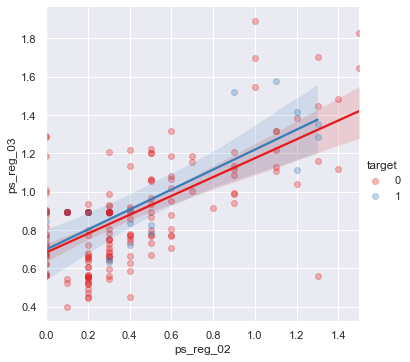

In [146]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1',
          scatter_kws={'alpha':0.3})
plt.show()

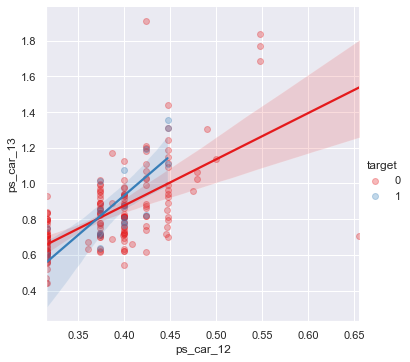

In [147]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

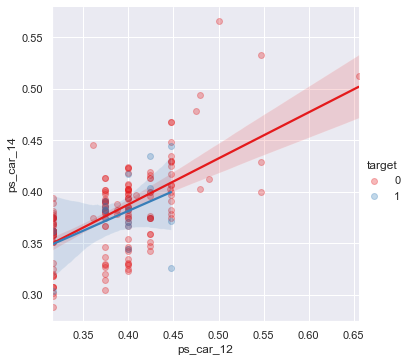

In [148]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

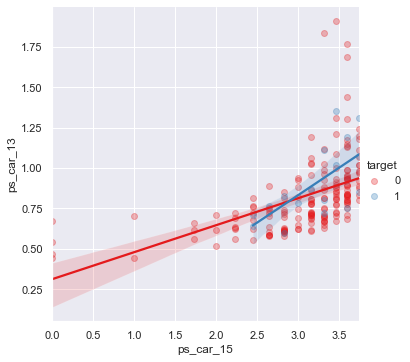

In [149]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

+ alright, so now what? How can we decide which of the correlated variables to keep? We could perform principal component analysis(PCA) on the variables to reduce the dimensions.
+ In the AllState Claims Severity Competition author made [kernel](https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca) to do that. But as the number of correlated variables is rather low, we will let the model do the heavy lifting.

# Feature engineering
+ creading dummy variables

+ The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category1 .

+ Therefore we can create dummy variables to deal with that. 

+ We drop the first dummy variables as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [151]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
v

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'],
      dtype='object', name='varname')

In [152]:
train = pd.get_dummies(train, columns=v, drop_first=True)

In [154]:
train.shape

(1939, 104)

+ creating interaction variables

In [155]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

In [156]:
PolynomialFeatures

sklearn.preprocessing._data.PolynomialFeatures

In [158]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [159]:
poly.fit_transform(train[v])

array([[0.4       , 0.3       , 0.96727711, ..., 0.        , 0.        ,
        0.25      ],
       [0.8       , 0.2       , 0.61083959, ..., 0.36      , 0.12      ,
        0.04      ],
       [0.9       , 0.3       , 0.82044195, ..., 0.36      , 0.42      ,
        0.49      ],
       ...,
       [0.3       , 0.        , 0.70489361, ..., 0.09      , 0.06      ,
        0.04      ],
       [0.7       , 0.4       , 0.90519335, ..., 0.04      , 0.18      ,
        0.81      ],
       [0.9       , 1.5       , 1.44416931, ..., 0.49      , 0.07      ,
        0.01      ]])

In [164]:
poly.get_feature_names(v)

['ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_reg_01^2',
 'ps_reg_01 ps_reg_02',
 'ps_reg_01 ps_reg_03',
 'ps_reg_01 ps_car_12',
 'ps_reg_01 ps_car_13',
 'ps_reg_01 ps_car_14',
 'ps_reg_01 ps_car_15',
 'ps_reg_01 ps_calc_01',
 'ps_reg_01 ps_calc_02',
 'ps_reg_01 ps_calc_03',
 'ps_reg_02^2',
 'ps_reg_02 ps_reg_03',
 'ps_reg_02 ps_car_12',
 'ps_reg_02 ps_car_13',
 'ps_reg_02 ps_car_14',
 'ps_reg_02 ps_car_15',
 'ps_reg_02 ps_calc_01',
 'ps_reg_02 ps_calc_02',
 'ps_reg_02 ps_calc_03',
 'ps_reg_03^2',
 'ps_reg_03 ps_car_12',
 'ps_reg_03 ps_car_13',
 'ps_reg_03 ps_car_14',
 'ps_reg_03 ps_car_15',
 'ps_reg_03 ps_calc_01',
 'ps_reg_03 ps_calc_02',
 'ps_reg_03 ps_calc_03',
 'ps_car_12^2',
 'ps_car_12 ps_car_13',
 'ps_car_12 ps_car_14',
 'ps_car_12 ps_car_15',
 'ps_car_12 ps_calc_01',
 'ps_car_12 ps_calc_02',
 'ps_car_12 ps_calc_03',
 'ps_car_13^2',
 'ps_car_13 ps_car_14',
 'ps_car_13 ps_car_15

In [165]:
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))

In [166]:
interactions

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.4,0.3,0.967277,0.447214,0.725481,0.406202,2.828427,0.1,0.0,0.5,0.16,0.12,0.386911,0.178885,0.290192,0.162481,1.131371,0.04,0.00,0.20,0.09,0.290183,0.134164,0.217644,0.121861,0.848528,0.03,0.00,0.15,0.935625,0.432579,0.701741,0.392910,2.735873,0.096728,0.000000,0.483639,0.20,0.324445,0.181659,1.264911,0.044721,0.000000,0.223607,0.526322,0.294692,2.051969,0.072548,0.000000,0.362740,0.165000,1.148913,0.040620,0.000000,0.203101,8.0,0.282843,0.000000,1.414214,0.01,0.00,0.05,0.00,0.00,0.25
1,0.8,0.2,0.610840,0.400000,0.567436,0.404969,2.236068,0.1,0.6,0.2,0.64,0.16,0.488672,0.320000,0.453949,0.323975,1.788854,0.08,0.48,0.16,0.04,0.122168,0.080000,0.113487,0.080994,0.447214,0.02,0.12,0.04,0.373125,0.244336,0.346612,0.247371,1.365879,0.061084,0.366504,0.122168,0.16,0.226974,0.161988,0.894427,0.040000,0.240000,0.080000,0.321983,0.229794,1.268825,0.056744,0.340462,0.113487,0.164000,0.905539,0.040497,0.242981,0.080994,5.0,0.223607,1.341641,0.447214,0.01,0.06,0.02,0.36,0.12,0.04
2,0.9,0.3,0.820442,0.316228,0.571662,0.303315,2.236068,0.6,0.6,0.7,0.81,0.27,0.738398,0.284605,0.514496,0.272984,2.012461,0.54,0.54,0.63,0.09,0.246133,0.094868,0.171499,0.090995,0.670820,0.18,0.18,0.21,0.673125,0.259447,0.469016,0.248852,1.834564,0.492265,0.492265,0.574309,0.10,0.180775,0.095917,0.707107,0.189737,0.189737,0.221359,0.326798,0.173394,1.278275,0.342997,0.342997,0.400163,0.092000,0.678233,0.181989,0.181989,0.212321,5.0,1.341641,1.341641,1.565248,0.36,0.36,0.42,0.36,0.42,0.49
3,0.8,0.6,0.985837,0.374166,0.720408,0.390768,3.316625,0.3,0.5,0.3,0.64,0.48,0.788670,0.299333,0.576326,0.312615,2.653300,0.24,0.40,0.24,0.36,0.591502,0.224499,0.432245,0.234461,1.989975,0.18,0.30,0.18,0.971875,0.368867,0.710205,0.385234,3.269652,0.295751,0.492919,0.295751,0.14,0.269552,0.146212,1.240967,0.112250,0.187083,0.112250,0.518988,0.281513,2.389323,0.216122,0.360204,0.216122,0.152700,1.296032,0.117231,0.195384,0.117231,11.0,0.994987,1.658312,0.994987,0.09,0.15,0.09,0.25,0.15,0.09
4,0.7,0.2,0.556215,0.374166,0.827035,0.360139,3.464102,0.1,0.1,0.8,0.49,0.14,0.389350,0.261916,0.578925,0.252097,2.424871,0.07,0.07,0.56,0.04,0.111243,0.074833,0.165407,0.072028,0.692820,0.02,0.02,0.16,0.309375,0.208117,0.460009,0.200315,1.926785,0.055621,0.055621,0.444972,0.14,0.309448,0.134752,1.296148,0.037417,0.037417,0.299333,0.683988,0.297848,2.864935,0.082704,0.082704,0.661628,0.129700,1.247558,0.036014,0.036014,0.288111,12.0,0.346410,0.346410,2.771281,0.01,0.01,0.08,0.01,0.08,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,0.6,0.4,0.792938,0.400000,0.971542,0.374968,3.316625,0.0,0.4,0.4,0.36,0.24,0.475763,0.240000,0.582925,0.224981

In [167]:
interactions.drop(v, axis=1, inplace=True)

In [169]:
train = pd.concat([train, interactions], axis=1)

In [170]:
train

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_1,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,66010,0,3,8,1,0,0,0,0,0,0,0,0,10,0,0,0,0.4,0.3,0.967277,3,0.447214,0.725481,0.406202,2.828427,0.1,0.0,0.5,4,3,7,2,10,2,14,6,0,1,8,0,1,0,0,1,0,0.101273,0,0,0,0,...,0.162481,1.131371,0.04,0.00,0.20,0.09,0.290183,0.134164,0.217644,0.121861,0.848528,0.03,0.00,0.15,0.935625,0.432579,0.701741,0.392910,2.735873,0.096728,0.000000,0.483639,0.20,0.324445,0.181659,1.264911,0.044721,0.000000,0.223607,0.526322,0.294692,2.051969,0.072548,0.000000,0.362740,0.165000,1.148913,0.040620,0.000000,0.203101,8.0,0.282843,0.000000,1.414214,0.01,0.00,0.05,0.00,0.00,0.25
1,57348,0,3,6,0,0,1,0,0,0,0,0,0,8,1,0,0,0.8,0.2,0.610840,0,0.400000,0.567436,0.404969,2.236068,0.1,0.6,0.2,4,2,7,1,12,2,11,3,2,3,7,0,0,0,0,0,0,0.098776,0,0,0,0,...,0.323975,1.788854,0.08,0.48,0.16,0.04,0.122168,0.080000,0.113487,0.080994,0.447214,0.02,0.12,0.04,0.373125,0.244336,0.346612,0.247371,1.365879,0.061084,0.366504,0.122168,0.16,0.226974,0.161988,0.894427,0.040000,0.240000,0.080000,0.321983,0.229794,1.268825,0.056744,0.340462,0.113487,0.164000,0.905539,0.040497,0.242981,0.080994,5.0,0.223607,1.341641,0.447214,0.01,0.06,0.02,0.36,0.12,0.04
2,31597,0,5,8,0,0,0,1,0,0,0,0,0,13,1,0,0,0.9,0.3,0.820442,2,0.316228,0.571662,0.303315,2.236068,0.6,0.6,0.7,3,2,9,4,10,1,9,7,2,3,8,0,1,0,0,0,0,0.101535,0,0,0,1,...,0.272984,2.012461,0.54,0.54,0.63,0.09,0.246133,0.094868,0.171499,0.090995,0.670820,0.18,0.18,0.21,0.673125,0.259447,0.469016,0.248852,1.834564,0.492265,0.492265,0.574309,0.10,0.180775,0.095917,0.707107,0.189737,0.189737,0.221359,0.326798,0.173394,1.278275,0.342997,0.342997,0.400163,0.092000,0.678233,0.181989,0.181989,0.212321,5.0,1.341641,1.341641,1.565248,0.36,0.36,0.42,0.36,0.42,0.49
3,100812,0,3,3,0,0,1,0,0,0,0,0,0,10,0,0,0,0.8,0.6,0.985837,1,0.374166,0.720408,0.390768,3.316625,0.3,0.5,0.3,3,1,5,6,8,4,10,8,2,0,12,0,1,1,0,1,0,0.100188,0,0,0,1,...,0.312615,2.653300,0.24,0.40,0.24,0.36,0.591502,0.224499,0.432245,0.234461,1.989975,0.18,0.30,0.18,0.971875,0.368867,0.710205,0.385234,3.269652,0.295751,0.492919,0.295751,0.14,0.269552,0.146212,1.240967,0.112250,0.187083,0.112250,0.518988,0.281513,2.389323,0.216122,0.360204,0.216122,0.152700,1.296032,0.117231,0.195384,0.117231,11.0,0.994987,1.658312,0.994987,0.09,0.15,0.09,0.25,0.15,0.09
4,14930,0,1,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0.7,0.2,0.556215,2,0.374166,0.827035,0.360139,3.464102,0.1,0.1,0.8,2,1,6,3,5,3,6,2,3,2,5,0,1,0,1,0,0,0.098097,0,1,0,0,...,0.252097,2.424871,0.07,0.07,0.56,0.04,0.111243,0.0

# Feature selection
+ removing features with low or zero variance
+ personally, I prefer to let the classifier algorithm choose which features to keep.
+ but there is one thing that we can do ourselves.
+ that is removing features with no or a very low variance
+ sklearn has a handy method to do that: variance threshold
+ by default it removes featur with zero variance.
+ this will not be applicable for this competition.
+ as we saw there are no zero variance variables in the previous steps.
+ but if we would remove features with less than 1% variance we would remove 31 variables.

In [171]:
selector = VarianceThreshold(threshold=0.01)

In [172]:
selector.fit(train.drop(['id', 'target'], axis=1))

VarianceThreshold(threshold=0.01)

In [173]:
v = train.drop(['id', 'target'], axis=1)

In [174]:
selector.get_support() # threshold 보다 크면 true

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [175]:
f = np.vectorize(lambda x : not x)

In [176]:
f(selector.get_support())

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

+ we would lose rather many variables if we would select based on variance.
+ but because we do not have so many variables, we will let the classifier choose.
+ for data sets with many more variables this could reduce the processing time.

[sklearn feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

+ recursive feature elimination을 좋아하서 자주 사용한다 함.


+ 1000개의 피쳐 한개씩 넣고 빼서 고르면 너무 오래 걸려요. block 쓰면 됩니다. 20개씩 나눠서 블록별로 성능 비교.

+ feature importance 재는 방법도 있다.

+ here we will base feature selection on the feature importance

> 20 모델 baseline 만들고 + random choosing 20, 40 모델 학습 basline 비교
> if 성능 향상 -> feature importance 상위 10%에 새로 추가된거 생기면 걔를 남기고 안생기면 다른거 random choosing 반복

+ code borrowed from [github repo](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb)

In [177]:
X_train = train.drop(['id', 'target'], axis =1)
y_train = train['target']

In [178]:
feat_labels = X_train.columns

In [179]:
rf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

In [189]:
rf.fit(X_train[0:7000], y_train[0:7000])

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [190]:
importances = rf.feature_importances_

In [191]:
indices = np.argsort(rf.feature_importances_)[::-1]

In [192]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_reg_03 ps_calc_03           0.023005
 2) ps_car_14 ps_car_15            0.022614
 3) ps_calc_14                     0.021002
 4) ps_reg_01 ps_car_13            0.020374
 5) ps_car_13 ps_car_14            0.020280
 6) ps_reg_03 ps_car_13            0.019962
 7) ps_reg_03 ps_car_15            0.018906
 8) ps_car_11_cat_te               0.018651
 9) ps_car_14 ps_calc_03           0.018513
10) ps_ind_03                      0.018155
11) ps_car_13^2                    0.017741
12) ps_car_14 ps_calc_02           0.017430
13) ps_car_13 ps_car_15            0.017262
14) ps_car_14                      0.017102
15) ps_reg_03 ps_calc_01           0.016813
16) ps_car_14^2                    0.016416
17) ps_reg_02 ps_car_15            0.016022
18) ps_car_13 ps_calc_01           0.015224
19) ps_reg_02 ps_car_13            0.014638
20) ps_car_12 ps_calc_01           0.014047
21) ps_reg_03 ps_car_14            0.013962
22) ps_car_13 ps_calc_02           0.013769
23) ps_reg_01 ps_calc_03        

+ with SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances.
+ with the `get_support` method we can then limit the number of variables in the train data.

In [195]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 157
Number of features after selection: 79


In [196]:
train = train[selected_vars + ['target']]

In [197]:
train.shape

(1939, 80)

+ Feature scaling

+ as mentioned before we can apply standard scaling to the training data. some classifiers perform better when this is done.

+ tree는 안해도 됨. 선형적. 데이터분포에 영향을 받는 모형의 경우는 필요.

In [198]:
scaler = StandardScaler()

In [199]:
scaler.fit_transform(train.drop(['target'], axis=1))

array([[ 0.52834208,  1.27438244, -0.5862835 , ..., -1.04037596,
        -1.01384634, -0.15557813],
       [ 0.52834208,  0.54514309, -0.5862835 , ...,  0.30905644,
        -0.41471553, -0.93690345],
       [ 1.52344193,  1.27438244, -0.5862835 , ...,  0.30905644,
         1.0831115 ,  0.7373651 ],
       ...,
       [-0.46675777, -0.54871595, -0.5862835 , ..., -0.70301786,
        -0.71428093, -0.93690345],
       [-0.96430769, -0.91333562,  1.70565946, ..., -0.89043902,
        -0.11515012,  1.92795606],
       [ 0.52834208, -0.91333562, -0.5862835 , ...,  0.79635147,
        -0.66435336, -1.04852135]])

In [200]:
scaler.mean_

array([1.93811243, 4.50489943, 0.25580196, 7.31614234, 0.89531368,
       0.38036694, 0.81524824, 0.3749683 , 3.07928316, 0.45740072,
       0.45863847, 2.38318721, 1.84373388, 3.04074265, 9.19391439,
       2.33986591, 8.45951521, 5.45332646, 1.43579165, 2.82207323,
       7.56111398, 0.09967477, 0.03919546, 0.01134605, 0.30892212,
       0.45017019, 0.31633316, 0.55565146, 0.23039444, 0.49514772,
       0.22718738, 1.87295619, 0.27597215, 0.26828778, 0.27829293,
       0.34253223, 0.46868946, 0.16591195, 0.36081598, 0.16160574,
       1.32673533, 0.19578649, 0.1939247 , 0.1970655 , 0.90024855,
       0.34408637, 0.74327628, 0.33716044, 2.76632081, 0.40829197,
       0.3986889 , 0.41121198, 0.14797741, 0.31859983, 0.14410387,
       1.17318002, 0.17424852, 0.16814499, 0.17436953, 0.71236812,
       0.30974697, 2.58988835, 0.37360904, 0.36216694, 0.37355071,
       0.14251447, 1.15433467, 0.17118549, 0.16573586, 0.17222874,
       9.96750903, 1.41194312, 1.36805674, 1.41017814, 0.19764

In [201]:
scaler.var_

array([4.03949123e+00, 7.52176558e+00, 1.90367317e-01, 1.25895847e+01,
       9.86619681e-02, 3.29840308e-03, 4.77384322e-02, 1.91323837e-03,
       4.85524250e-01, 8.40233624e-02, 8.14661194e-02, 1.27916034e+00,
       1.26129519e+00, 1.97925804e+00, 2.15424868e+00, 1.59722969e+00,
       8.22876325e+00, 5.35354618e+00, 1.30931205e+00, 2.72491762e+00,
       7.38602785e+00, 1.85936494e-06, 3.76591774e-02, 1.12173217e-02,
       2.13489246e-01, 9.31081196e-02, 1.25488411e-01, 1.41519544e-01,
       1.31905003e-02, 7.68672683e-02, 1.23165510e-02, 1.00466016e+00,
       5.48263241e-02, 5.34024319e-02, 5.29180246e-02, 3.43504315e-01,
       3.83320512e-01, 2.69382220e-02, 1.46590496e-01, 2.45271603e-02,
       1.71433240e+00, 6.27133964e-02, 6.59093517e-02, 6.46461076e-02,
       5.22036588e-01, 2.05185590e-02, 1.40511672e-01, 1.70230086e-02,
       1.40707160e+00, 9.71475730e-02, 9.93256994e-02, 9.54651569e-02,
       2.26305712e-03, 1.78860052e-02, 1.30556927e-03, 1.03826971e-01,
      

In [202]:
scaler.transform(test)

ValueError: X has 58 features, but StandardScaler is expecting 79 features as input.

+ take home message
+ scailing : train으로 fit 시키고 그 다음에 test 변환.

1. 

In [204]:
'''
scaler = StandardScaler()

df_train = scaler.fit_transform(df_train)
dt_test = scaler.transform(dt_test)
'''

'\nscaler = StandardScaler()\n\ndf_train = scaler.fit_transform(df_train)\ndt_test = scaler.transform(dt_test)\n'